##**POSTTEST 2**

##Import Library

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

##Membaca Dataset  

In [33]:
df = pd.read_csv('/content/meetup.csv', delimiter=';')
df.head()

,date,state,category,time,groupname,name,attendees_count,Unnamed: 7
0,20/04/2020,San-Francisco,"Technology,business",12:00 AM,Product School Bangalore,Webinar: PM in a Startup Setting by Alexa Prod...,6,NaN
1,20/04/2020,San-Francisco,"Technology,business",7:00 AM,SouJava,Live SouJava- Microservice Patterns - Implemen...,119,NaN
2,20/04/2020,San-Francisco,"Technology,business",7:30 AM,DevOps | CODE Event Series,enterprise:CODE 2020,10,NaN
3,20/04/2020,San-Francisco,"Technology,business",8:00 AM,DC Cybersecurity Training,Certified CISO,4,NaN
4,20/04/2020,San-Francisco,"Technology,business",8:00 AM,DC Cybersecurity Training,Certified Ethical Hacker (CEH),3,NaN


##Menampilkan statistik deskriptif untuk kolom numerik

In [34]:
print(df['attendees_count'].describe())

count    184.000000
mean      22.619565
std       29.360895
min        1.000000
25%        5.000000
50%       10.000000
75%       24.500000
max      157.000000
Name: attendees_count, dtype: float64


##Menampilkan 10 record pertama dari atribut bertipe angka

In [35]:
df['attendees_count'].head(10)

,attendees_count
0,6
1,119
2,10
3,4
4,3
5,6
6,11
7,11
8,9
9,5


##Menampilkan informasi umum dataset

In [36]:
jumlah_record, jumlah_atribut = df.shape
nama_atribut = df.columns.tolist()
jumlah_atribut_angka = df.select_dtypes(include=['int64', 'float64']).shape[1]

print(f"Jumlah Record         : {jumlah_record}")
print(f"Jumlah Atribut        : {jumlah_atribut}")
print(f"Nama Semua Atribut    : {nama_atribut}")
print(f"Jumlah Atribut Angka  : {jumlah_atribut_angka}")

Jumlah Record         : 184
Jumlah Atribut        : 8
Nama Semua Atribut    : ['date', 'state', 'category', 'time', 'groupname', 'name', 'attendees_count', 'Unnamed: 7']
Jumlah Atribut Angka  : 2


##Jumlah label dari semua attribute yang bernilai object

In [41]:
df_object = df.select_dtypes(include=['object'])

for kolom in df_object.columns:
    if kolom not in ['name', 'time']:
        print(f"\nAtribut: '{kolom}'")
        print(df[kolom].value_counts())


Atribut: 'date'
date
20/04/2020    81
21/04/2020    39
23/04/2020    39
24/04/2020     9
28/04/2020     4
25/04/2020     3
30/04/2020     3
29/04/2020     3
26/04/2020     2
27/04/2020     1
Name: count, dtype: int64

Atribut: 'state'
state
San-Francisco    184
Name: count, dtype: int64

Atribut: 'category'
category
Technology,business    184
Name: count, dtype: int64

Atribut: 'groupname'
groupname
Product School San Francisco                                   5
Microsoft Reactor San Francisco                                4
Product School Silicon Valley                                  3
IBM Developer SF Bay Area                                      3
Startup Founders, Cofounders, Entrepreneurs and Engineers      3
                                                              ..
Whiteboard Warriors - Silicon Valley                           1
Silicon Valley Professional Scrum meetup                       1
UX WIZARDS OF THE SOUTH BAY                                    1
SF Bay ACM 

##Diagram Batang

/tmp/ipython-input-3193310619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_groups.values, y=top_10_groups.index, palette='viridis')


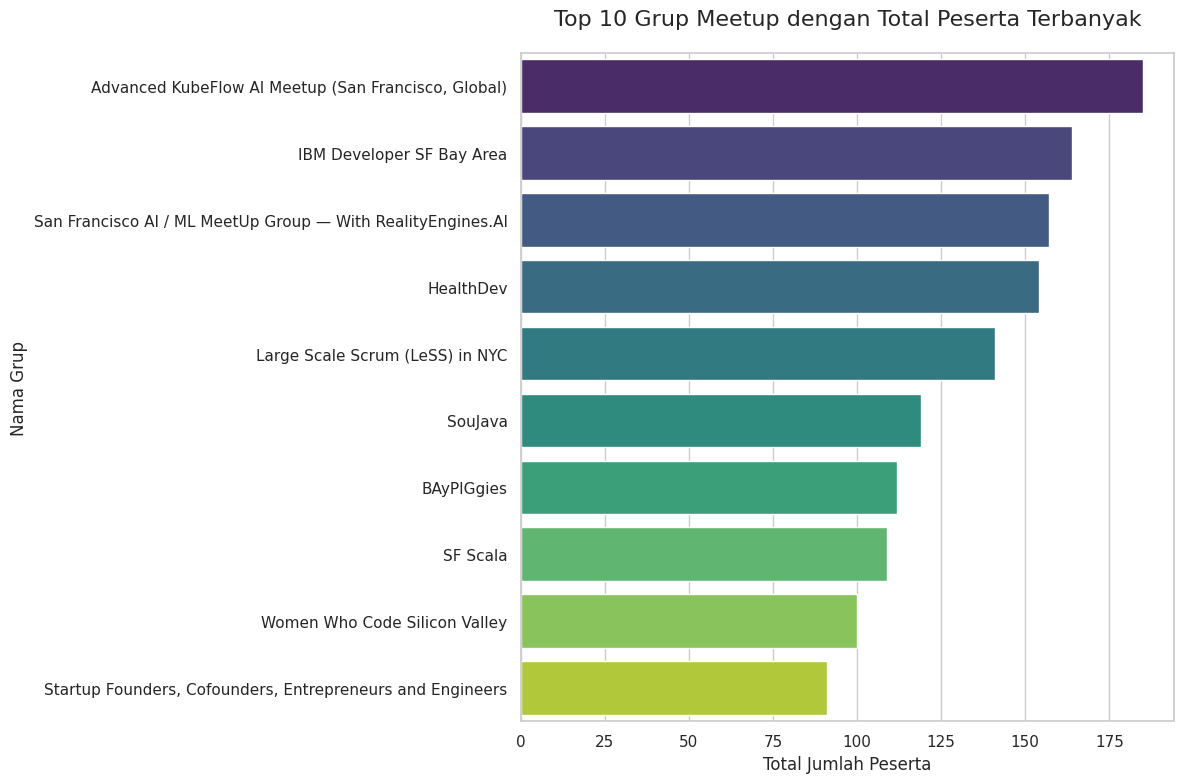

In [42]:
top_10_groups = df.groupby('groupname')['attendees_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_groups.values, y=top_10_groups.index, palette='viridis')

plt.title('Top 10 Grup Meetup dengan Total Peserta Terbanyak', fontsize=16, pad=20)
plt.xlabel('Total Jumlah Peserta', fontsize=12)
plt.ylabel('Nama Grup', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan **10 grup Meetup dengan jumlah peserta terbanyak.**  

- **Advanced KubeFlow AI Meetup (San Francisco, Global)** menempati urutan pertama dengan peserta terbanyak (sekitar 185 orang).  
- Disusul oleh **IBM Developer SF Bay Area** dan **San Francisco AI/ML Meetup Group — With RealityEngines.AI**, keduanya memiliki jumlah peserta lebih dari 160 orang.  
- Grup seperti **HealthDev**, **Large Scale Scrum (LeSS) in NYC**, dan **SouJava** juga cukup populer dengan peserta di kisaran 120–150 orang.  
- Grup lain seperti **BAyPIGgies**, **SF Scala**, dan **Women Who Code Silicon Valley** memiliki jumlah peserta sekitar 100–120 orang.  
- Sementara itu, **Startup Founders, Cofounders, Entrepreneurs and Engineers** berada di posisi terakhir dari daftar 10 besar dengan peserta di bawah 100 orang.

##Korelasi menggunakan Headmap

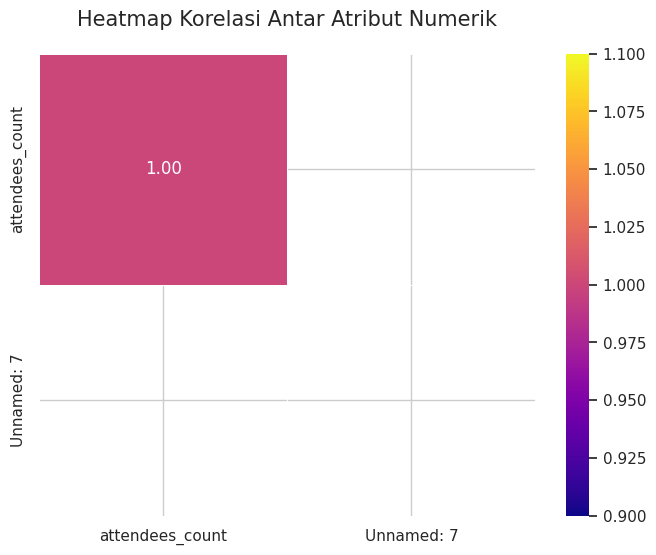

In [44]:
matriks_korelasi = df.select_dtypes(include=['int64', 'float64']).corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriks_korelasi, annot=True, cmap='plasma', fmt='.2f', linewidths=.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Atribut Numerik', fontsize=15, pad=20)

# Menampilkan heatmap
plt.show()

Heatmap di atas menunjukkan korelasi antar atribut numerik dalam dataset.  
Terlihat hanya ada satu kolom numerik yang valid, yaitu **`attendees_count`**, sehingga nilai korelasi hanya muncul dengan dirinya sendiri sebesar **1.00**.  

Adanya kolom **`Unnamed: 7`** kemungkinan berasal dari kolom kosong atau index tambahan saat proses import data, sehingga tidak memberikan informasi korelasi yang bermakna.  